# Data Preparation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
DataDictionary = pd.read_csv(r'C:\Users\nmtii\Downloads\GiveMeSomeCredit\Data Dictionary.csv')
with pd.option_context('display.max_colwidth', None):
    display(DataDictionary)

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquency or worse,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or more past due.,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans including home equity lines of credit,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days past due but no worse in the last 2 years.,integer


In [3]:
loan_data_backup = pd.read_csv(r'C:\Users\nmtii\Downloads\GiveMeSomeCredit\cs-training.csv')

In [4]:
loan_data = loan_data_backup.copy()

## Explore Data

In [5]:
loan_data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [6]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

## General Preprocessing

### Preprocessing few continuous variables

In [7]:
loan_data['age'].unique()
# Displays unique values of a column.

array([ 45,  40,  38,  30,  49,  74,  57,  39,  27,  51,  46,  76,  64,
        78,  53,  43,  25,  32,  58,  50,  69,  24,  28,  62,  42,  75,
        26,  52,  41,  81,  31,  68,  70,  73,  29,  55,  35,  72,  60,
        67,  36,  56,  37,  66,  83,  34,  44,  48,  61,  80,  47,  59,
        77,  63,  54,  33,  79,  65,  86,  92,  23,  87,  71,  22,  90,
        97,  84,  82,  91,  89,  85,  88,  21,  93,  96,  99,  94,  95,
       101,  98, 103, 102, 107, 105,   0, 109], dtype=int64)

In [8]:
loan_data['age'] = pd.to_numeric(loan_data['age'])
# Transforms the values to numeric.

In [9]:
type(loan_data['age'][0])
# Checks the datatype of a single element of a column.

numpy.int64

### Preprocessing few discrete variables

In [10]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

### Check for missing values and clean

In [11]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.
loan_data.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [12]:
loan_data['MonthlyIncome'].fillna(loan_data['MonthlyIncome'].mean(), inplace=True)
# We fill the missing values with the mean value of the non-missing values.

In [13]:
loan_data['NumberOfDependents'].fillna(0, inplace=True)
# We fill the missing values with zeroes.

In [14]:
loan_data.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

# PD model

## Data preparation

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [15]:
loan_data['SeriousDlqin2yrs'].unique()
# Displays unique values of a column.

array([1, 0], dtype=int64)

In [16]:
loan_data['SeriousDlqin2yrs'].value_counts()
# Calculates the number of observations for each unique value of a variable.

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [17]:
loan_data['SeriousDlqin2yrs'].value_counts() / loan_data['SeriousDlqin2yrs'].count()
# We divide the number of observations for each unique value of a variable by the total number of observations.
# Thus, we get the proportion of observations for each unique value of a variable.

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

### Splitting Data

In [18]:
from sklearn.model_selection import train_test_split
# Imports the libraries we need.

In [19]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('SeriousDlqin2yrs', axis = 1), loan_data['SeriousDlqin2yrs'])
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.

In [20]:
loan_data_inputs_train.shape
# Displays the size of the dataframe.

(112500, 11)

In [21]:
loan_data_targets_train.shape
# Displays the size of the dataframe.

(112500,)

In [22]:
loan_data_inputs_test.shape
# Displays the size of the dataframe.

(37500, 11)

In [23]:
loan_data_targets_test.shape
# Displays the size of the dataframe.

(37500,)

In [24]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('SeriousDlqin2yrs', axis = 1), loan_data['SeriousDlqin2yrs'], test_size = 0.2, random_state = 9)
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.
# This time we set the size of the test dataset to be 20%.
# Respectively, the size of the train dataset becomes 80%.
# We also set a specific random state.
# This would allow us to perform the exact same split multimple times.
# This means, to assign the exact same observations to the train and test datasets.

In [25]:
loan_data_inputs_train.shape
# Displays the size of the dataframe.

(120000, 11)

In [26]:
loan_data_targets_train.shape
# Displays the size of the dataframe.

(120000,)

In [27]:
loan_data_inputs_test.shape
# Displays the size of the dataframe.

(30000, 11)

In [28]:
loan_data_targets_test.shape
# Displays the size of the dataframe.

(30000,)

Preprocessing Discrete Variables: Visualizing Results

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Imports the libraries we need.
sns.set()
# We set the default style of the graphs to the seaborn style. 

## Weight of Evidence WOE
1. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable.
2. WOE = ln(#good/#bad)
3. Log of a number > 1 is positive value and less than 1, it is negative.
4. Positive value means it has more +ve class than -ve class and vice versa.
5. Near zero value means feature is not able sepearted +ve and -ve value.
6. For other domain WOE = ln(#non event/# event)
7. Weight of Evidence (WOE) helps to transform a continuous independent variable into a set of groups or bins based on similarity of dependent variable distribution i.e. number of events and non-events. 
8. For continuous independent variables : First, create bins (categories / groups) for a continuous independent variable and then combine categories with similar WOE values
9. For categorical independent variables : Combine categories with similar WOE and then create new categories of an independent variable with continuous WOE values.
10. Rules related to WOE
    -  Each category (bin) should have at least 5% of the observations.
    - Each category (bin) should be non-zero for both non-events and events.
    - The WOE should be distinct for each category. Similar groups should be aggregated.
    - The WOE should be monotonic, i.e. either growing or decreasing with the groupings.
    - Missing values are binned separately.
11. Handle Zero Event/ Non-Event

If a particular bin contains no event or non-event, you can use the formula below to ignore missing WOE. We are adding 0.5 to the number of events and non-events in a group.

$ AdjustedWOE = ln (((Number of non-events in a group + 0.5) / Number of non-events)) / ((Number of events in a group + 0.5) / Number of events))$
12. How to check correct binning with WOE

    - The WOE should be monotonic i.e. either growing or decreasing with the bins. You can plot WOE values and check linearity on the graph.
    - Perform the WOE transformation after binning. Next, we run logistic regression with 1 independent variable having WOE values. If the slope is not 1 or the intercept is not ln(% of non-events / % of events) then the binning algorithm is not good.
13. Benefits of WOE
    - It can treat outliers. Suppose you have a continuous variable such as annual salary and extreme values are more than 500 million dollars. These values would be grouped to a class of (let's say 250-500 million dollars). Later, instead of using the raw values, we would be using WOE scores of each classes.
    - It can handle missing values as missing values can be binned separately.
    - Since WOE Transformation handles categorical variable so there is no need for dummy variables.
    - WoE transformation helps you to build strict linear relationship with log odds. Otherwise it is not easy to accomplish linear relationship using other transformation methods such as log, square-root etc. In short, if you would not use WOE transformation, you may have to try out several transformation methods to achieve this.


[Ref:listendata](https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html)

## Information Value (IV)
1. Information value is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance
2. $ IV = ∑ (proportion of nonevents - proportion of events) * WOE$
3. Information Value 	Variable Predictiveness
    - **Less than 0.02**:    	Not useful for prediction
    - **0.02 to 0.1**:    	Weak predictive Power
    - **0.1 to 0.3**:    	Medium predictive Power
    - **0.3 to 0.5**:    	Strong predictive Power
    - **more than 0.5**:    	Suspicious Predictive Power
4. Important Points
    - Information value increases as bins / groups increases for an independent variable. Be careful when there are more than 20 bins as some bins may have a very few number of events and non-events.
    - Information value is not an optimal feature (variable) selection method when you are building a classification model other than binary logistic regression (for eg. random forest or SVM) as conditional log odds (which we predict in a logistic regression model) is highly related to the calculation of weight of evidence. In other words, it's designed mainly for binary logistic regression model. Also think this way - Random forest can detect non-linear relationship very well so selecting variables via Information Value and using them in random forest model might not produce the most accurate and robust predictive model.
    
[Ref:listendata](https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html)

In [30]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [58]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    print('**'*50)
    print(df.head(20))
    print('**'*50)
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    print('**'*50)
    print(df.head(20))
    print('**'*50)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    print('**'*50)
    print(df.head(20))
    print('**'*50)
    df = df.iloc[:, [0, 1, 3]]
    print('**'*50)
    print(df.head(20))
    print('**'*50)
    df.columns = [df.columns.values[0], 'n_obs', 'prop_bad']
    print('**'*50)
    print(df.head(20))
    print('**'*50)
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    #df['diff_prop_bad'] = df['prop_bad'].diff().abs()
    #df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    print('**'*50)
    print(df.head(20))
    print('**'*50)
    df['IV'] = df['IV'].sum()
    print('**'*50)
    print(df.head(20))
    print('**'*50)
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [59]:
#####
#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train
#####
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

In [60]:
list(df_inputs_prepr)

['Unnamed: 0',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [61]:
df_inputs_prepr['NumberOfDependents'].unique()

array([ 0.,  2.,  1.,  3.,  4.,  5.,  6., 10.,  7.,  8.])

In [62]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'NumberOfDependents', df_targets_prepr)
# We calculate weight of evidence.
df_temp

****************************************************************************************************
        Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
96727        96728                              0.524894   44   
26241        26242                              0.175686   59   
2345          2346                              0.083254   42   
63665        63666                              0.191490   33   
106509      106510                              0.000000   30   
130093      130094                              0.004738   56   
80480        80481                              1.000000   43   
132589      132590                              0.660910   77   
74562        74563                              0.303710   36   
97574        97575                              0.312037   51   
28071        28072                              0.073245   37   
28820        28821                              0.000000   91   
74285        74286                              0.0504

,NumberOfDependents,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,0.0,18178,0.057322,0.605933,1042.0,17136.0,0.610670,0.537390,0.127831,inf
1,1.0,5345,0.068849,0.178167,368.0,4977.0,0.177364,0.189789,-0.067709,inf
2,2.0,3910,0.077749,0.130333,304.0,3606.0,0.128506,0.156782,-0.198882,inf
3,3.0,1836,0.083878,0.061200,154.0,1682.0,0.059941,0.079422,-0.281422,inf
4,4.0,546,0.104396,0.018200,57.0,489.0,0.017426,0.029397,-0.522897,inf
5,5.0,136,0.066176,0.004533,9.0,127.0,0.004526,0.004642,-0.025246,inf
6,6.0,34,0.117647,0.001133,4.0,30.0,0.001069,0.002063,-0.657305,inf
7,7.0,9,0.111111,0.000300,1.0,8.0,0.000285,0.000516,-0.592767,inf
8,8.0,4,0.000000,0.000133,0.0,4.0,0.000143,0.000000,inf,inf
9,10.0,2,0.000000,0.000067,0.0,2.0,0.000071,0.000000,inf,inf


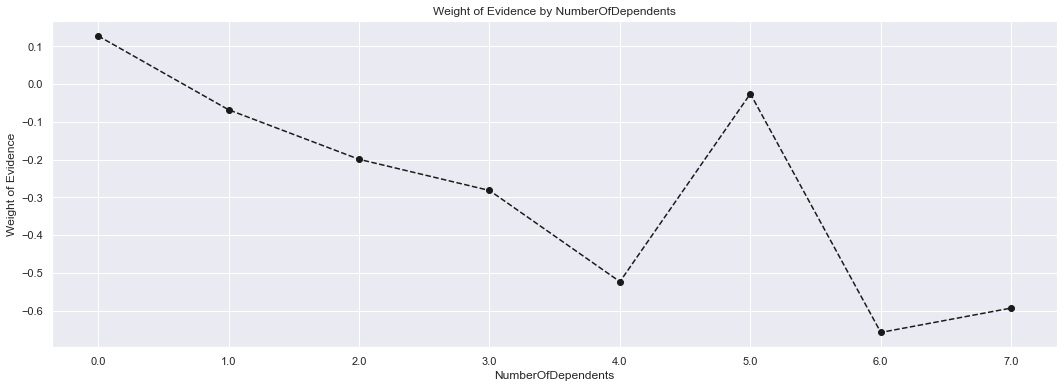

In [44]:
plot_by_woe(df_temp)

In [45]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'age', df_targets_prepr)
# We calculate weight of evidence.
df_temp

****************************************************************************************************
        Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
96727        96728                              0.524894   44   
26241        26242                              0.175686   59   
2345          2346                              0.083254   42   
63665        63666                              0.191490   33   
106509      106510                              0.000000   30   
130093      130094                              0.004738   56   
80480        80481                              1.000000   43   
132589      132590                              0.660910   77   
74562        74563                              0.303710   36   
97574        97575                              0.312037   51   
28071        28072                              0.073245   37   
28820        28821                              0.000000   91   
74285        74286                              0.0504

,age,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,21,30,0.066667,0.001000,2.0,28.0,0.000998,0.001031,-0.033151,inf
1,22,77,0.116883,0.002567,9.0,68.0,0.002423,0.004642,-0.649925,inf
2,23,132,0.106061,0.004400,14.0,118.0,0.004205,0.007220,-0.540581,inf
3,24,160,0.131250,0.005333,21.0,139.0,0.004953,0.010830,-0.782257,inf
4,25,170,0.076471,0.005667,13.0,157.0,0.005595,0.006704,-0.180912,inf
5,26,273,0.128205,0.009100,35.0,238.0,0.008482,0.018051,-0.755286,inf
6,27,298,0.087248,0.009933,26.0,272.0,0.009693,0.013409,-0.324503,inf
7,28,325,0.116923,0.010833,38.0,287.0,0.010228,0.019598,-0.650312,inf
8,29,332,0.108434,0.011067,36.0,296.0,0.010548,0.018566,-0.565368,inf
9,30,361,0.110803,0.012033,40.0,321.0,0.011439,0.020629,-0.589647,inf


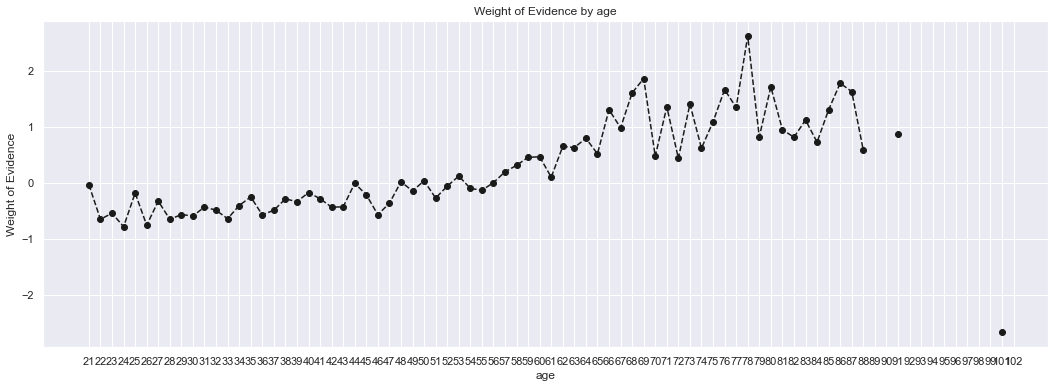

In [46]:
plot_by_woe(df_temp)

For each of the two variables:

1. Determine whether you should do fine classing of the variable, that is, cut it into categories. If yes, use the ‘pd.cut’ method to do the fine classing.

2. Run the ‘woe_discrete’ function with the following arguments: the ‘df_inputs_prepr’ dataframe, the respective independent variable, and the ‘df_targets_prepr’ dataframe. Display the dataframe with results.

3. Run the ‘plot_by_woe’ function with the dataframe with results as an argument. Display the chart with weights of evidence by original categories of the independent variable.

4. Examine the chart and the dataframe with results. Decide what categories of the independent variable we should have as dummy variables for the PD model and create them, if necessary.

5. Decide which one should be the reference category and make a note for it.

In [63]:
df_inputs_prepr['age_factor'] = pd.cut(df_inputs_prepr['age'], 5)

In [64]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'age_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

****************************************************************************************************
        Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
96727        96728                              0.524894   44   
26241        26242                              0.175686   59   
2345          2346                              0.083254   42   
63665        63666                              0.191490   33   
106509      106510                              0.000000   30   
130093      130094                              0.004738   56   
80480        80481                              1.000000   43   
132589      132590                              0.660910   77   
74562        74563                              0.303710   36   
97574        97575                              0.312037   51   
28071        28072                              0.073245   37   
28820        28821                              0.000000   91   
74285        74286                              0.0504

,age_factor,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,"(20.919, 37.2]",5365,0.103262,0.178833,554.0,4811.0,0.171448,0.285714,-0.510713,0.21808
1,"(37.2, 53.4]",10816,0.079234,0.360533,857.0,9959.0,0.354905,0.441980,-0.219414,0.21808
2,"(53.4, 69.6]",9876,0.043945,0.329200,434.0,9442.0,0.336481,0.223827,0.407670,0.21808
3,"(69.6, 85.8]",3521,0.024993,0.117367,88.0,3433.0,0.122341,0.045384,0.991645,0.21808
4,"(85.8, 102.0]",422,0.014218,0.014067,6.0,416.0,0.014825,0.003094,1.566717,0.21808


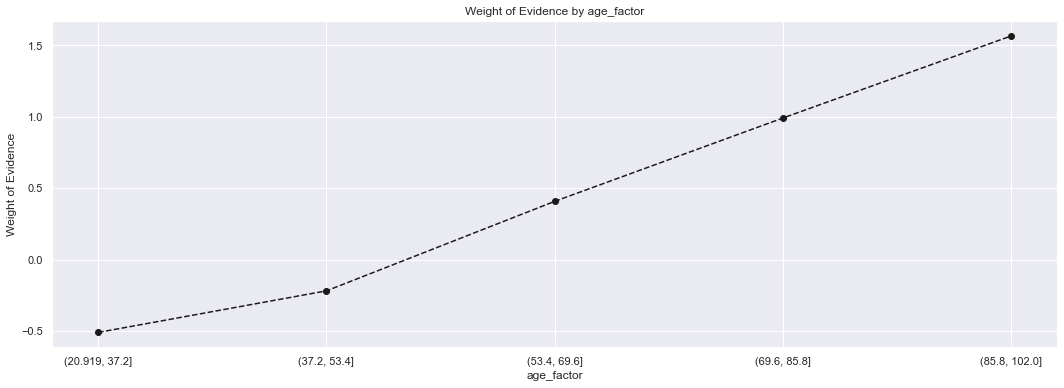

In [65]:
plot_by_woe(df_temp)

In [66]:
df_inputs_prepr['age:<=21'] = np.where(df_inputs_prepr['age'].isin(range(0,22)), 1, 0)
df_inputs_prepr['age:22-43'] = np.where(df_inputs_prepr['age'].isin(range(22, 44)), 1, 0)
df_inputs_prepr['age:44-65'] = np.where(df_inputs_prepr['age'].isin(range(44, 66)), 1, 0)
df_inputs_prepr['age:66>='] = np.where(df_inputs_prepr['age'].isin(range(66, 200)), 1, 0)

In [67]:
df_inputs_prepr['age:66>='].sum()

5769

In [68]:
list(df_inputs_prepr)

['Unnamed: 0',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'age_factor',
 'age:<=21',
 'age:22-43',
 'age:44-65',
 'age:66>=']

In [69]:
df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines_factor'] = pd.cut(df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'], 30)

In [70]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'RevolvingUtilizationOfUnsecuredLines_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

****************************************************************************************************
        Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
96727        96728                              0.524894   44   
26241        26242                              0.175686   59   
2345          2346                              0.083254   42   
63665        63666                              0.191490   33   
106509      106510                              0.000000   30   
130093      130094                              0.004738   56   
80480        80481                              1.000000   43   
132589      132590                              0.660910   77   
74562        74563                              0.303710   36   
97574        97575                              0.312037   51   
28071        28072                              0.073245   37   
28820        28821                              0.000000   91   
74285        74286                              0.0504

,RevolvingUtilizationOfUnsecuredLines_factor,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,"(-22.0, 733.333]",29957,0.064626,0.998567,1936.0,28021.0,0.998575,0.998453,0.000122,inf
1,"(733.333, 1466.667]",6,0.000000,0.000200,0.0,6.0,0.000214,0.000000,inf,inf
2,"(1466.667, 2200.0]",6,0.000000,0.000200,0.0,6.0,0.000214,0.000000,inf,inf
3,"(2200.0, 2933.333]",6,0.166667,0.000200,1.0,5.0,0.000178,0.000516,-1.062770,inf
4,"(2933.333, 3666.667]",5,0.200000,0.000167,1.0,4.0,0.000143,0.000516,-1.285914,inf
5,"(3666.667, 4400.0]",5,0.000000,0.000167,0.0,5.0,0.000178,0.000000,inf,inf
6,"(4400.0, 5133.333]",3,0.000000,0.000100,0.0,3.0,0.000107,0.000000,inf,inf
7,"(5133.333, 5866.667]",2,0.000000,0.000067,0.0,2.0,0.000071,0.000000,inf,inf
8,"(5866.667, 6600.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
9,"(6600.0, 7333.333]",2,0.000000,0.000067,0.0,2.0,0.000071,0.000000,inf,inf


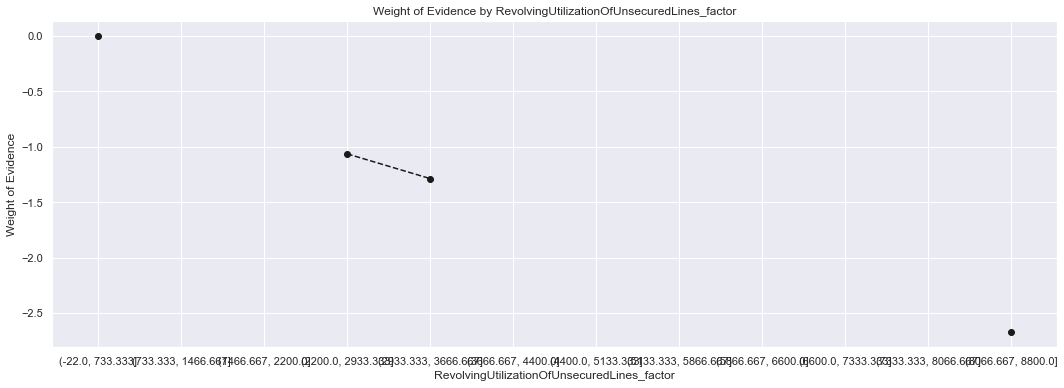

In [71]:
plot_by_woe(df_temp)

In [72]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'] <= 1691, : ]

In [73]:
df_inputs_prepr_temp["RevolvingUtilizationOfUnsecuredLines_factor"] = pd.cut(df_inputs_prepr_temp['RevolvingUtilizationOfUnsecuredLines'], 10)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'RevolvingUtilizationOfUnsecuredLines_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

****************************************************************************************************
        Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
96727        96728                              0.524894   44   
26241        26242                              0.175686   59   
2345          2346                              0.083254   42   
63665        63666                              0.191490   33   
106509      106510                              0.000000   30   
130093      130094                              0.004738   56   
80480        80481                              1.000000   43   
132589      132590                              0.660910   77   
74562        74563                              0.303710   36   
97574        97575                              0.312037   51   
28071        28072                              0.073245   37   
28820        28821                              0.000000   91   
74285        74286                              0.0504

<ipython-input-73-8834ad967b23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["RevolvingUtilizationOfUnsecuredLines_factor"] = pd.cut(df_inputs_prepr_temp['RevolvingUtilizationOfUnsecuredLines'], 10)


,RevolvingUtilizationOfUnsecuredLines_factor,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,"(-1.675, 167.5]",29954,0.064632,0.999633,1936.0,28018.0,0.999608,1.0,-0.000393,inf
1,"(167.5, 335.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
2,"(335.0, 502.5]",1,0.000000,0.000033,0.0,1.0,0.000036,0.0,inf,inf
3,"(502.5, 670.0]",2,0.000000,0.000067,0.0,2.0,0.000071,0.0,inf,inf
4,"(670.0, 837.5]",1,0.000000,0.000033,0.0,1.0,0.000036,0.0,inf,inf
5,"(837.5, 1005.0]",1,0.000000,0.000033,0.0,1.0,0.000036,0.0,inf,inf
6,"(1005.0, 1172.5]",3,0.000000,0.000100,0.0,3.0,0.000107,0.0,inf,inf
7,"(1172.5, 1340.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
8,"(1340.0, 1507.5]",1,0.000000,0.000033,0.0,1.0,0.000036,0.0,inf,inf
9,"(1507.5, 1675.0]",2,0.000000,0.000067,0.0,2.0,0.000071,0.0,inf,inf


In [74]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'] <= 1.5, : ]

In [75]:
df_inputs_prepr_temp["RevolvingUtilizationOfUnsecuredLines_factor"] = pd.cut(df_inputs_prepr_temp['RevolvingUtilizationOfUnsecuredLines'], 10)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'RevolvingUtilizationOfUnsecuredLines_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

****************************************************************************************************
        Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
96727        96728                              0.524894   44   
26241        26242                              0.175686   59   
2345          2346                              0.083254   42   
63665        63666                              0.191490   33   
106509      106510                              0.000000   30   
130093      130094                              0.004738   56   
80480        80481                              1.000000   43   
132589      132590                              0.660910   77   
74562        74563                              0.303710   36   
97574        97575                              0.312037   51   
28071        28072                              0.073245   37   
28820        28821                              0.000000   91   
74285        74286                              0.0504

<ipython-input-75-8834ad967b23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["RevolvingUtilizationOfUnsecuredLines_factor"] = pd.cut(df_inputs_prepr_temp['RevolvingUtilizationOfUnsecuredLines'], 10)


,RevolvingUtilizationOfUnsecuredLines_factor,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,"(-0.00149, 0.149]",14843,0.018931,0.496887,281.0,14562.0,0.520722,0.147352,1.262394,1.078198
1,"(0.149, 0.298]",3727,0.034612,0.124766,129.0,3598.0,0.128661,0.067646,0.642899,1.078198
2,"(0.298, 0.446]",2439,0.058631,0.081648,143.0,2296.0,0.082103,0.074987,0.090657,1.078198
3,"(0.446, 0.595]",1883,0.072756,0.063036,137.0,1746.0,0.062435,0.071841,-0.140321,1.078198
4,"(0.595, 0.744]",1522,0.095269,0.050951,145.0,1377.0,0.049240,0.076036,-0.434494,1.078198
5,"(0.744, 0.893]",1478,0.150203,0.049478,222.0,1256.0,0.044913,0.116413,-0.952412,1.078198
6,"(0.893, 1.041]",3691,0.198862,0.123561,734.0,2957.0,0.105739,0.384898,-1.292001,1.078198
7,"(1.041, 1.19]",197,0.416244,0.006595,82.0,115.0,0.004112,0.042999,-2.347210,1.078198
8,"(1.19, 1.339]",62,0.354839,0.002076,22.0,40.0,0.001430,0.011536,-2.087585,1.078198
9,"(1.339, 1.488]",30,0.400000,0.001004,12.0,18.0,0.000644,0.006293,-2.279957,1.078198


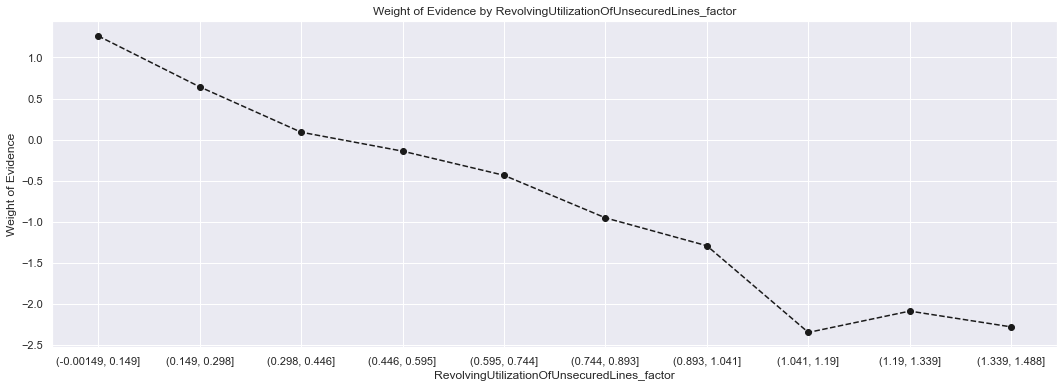

In [76]:
plot_by_woe(df_temp)

In [77]:
df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines:<0.15'] = np.where((df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'] <= 0.15), 1, 0)
df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines:0.15-0.3'] = np.where((df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'] > 0.15) & (df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'] <= 0.3), 1, 0)
df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines:0.3-0.45'] = np.where((df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'] > 0.3) & (df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'] <= 0.45), 1, 0)
df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines:0.45-0.6'] = np.where((df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'] > 0.45) & (df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'] <= 0.6), 1, 0)
df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines:0.6-0.75'] = np.where((df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'] > 0.6) & (df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'] <= 0.75), 1, 0)
df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines:0.75-0.9'] = np.where((df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'] > 0.75) & (df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'] <= 0.9), 1, 0)
df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines:0.9-1.05'] = np.where((df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'] > 0.9) & (df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'] <= 1.05), 1, 0)
df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines:1.05-1.20'] = np.where((df_inputs_prepr['RevolvingUtilizationOfUnsecuredLines'] > 1.05) , 1, 0)

In [78]:
list(df_inputs_prepr)

['Unnamed: 0',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'age_factor',
 'age:<=21',
 'age:22-43',
 'age:44-65',
 'age:66>=',
 'RevolvingUtilizationOfUnsecuredLines_factor',
 'RevolvingUtilizationOfUnsecuredLines:<0.15',
 'RevolvingUtilizationOfUnsecuredLines:0.15-0.3',
 'RevolvingUtilizationOfUnsecuredLines:0.3-0.45',
 'RevolvingUtilizationOfUnsecuredLines:0.45-0.6',
 'RevolvingUtilizationOfUnsecuredLines:0.6-0.75',
 'RevolvingUtilizationOfUnsecuredLines:0.75-0.9',
 'RevolvingUtilizationOfUnsecuredLines:0.9-1.05',
 'RevolvingUtilizationOfUnsecuredLines:1.05-1.20']

In [79]:
df_inputs_prepr['NumberOfTime30-59DaysPastDueNotWorse_factor'] = pd.cut(df_inputs_prepr['NumberOfTime30-59DaysPastDueNotWorse'], 5)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'NumberOfTime30-59DaysPastDueNotWorse_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

****************************************************************************************************
        Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
96727        96728                              0.524894   44   
26241        26242                              0.175686   59   
2345          2346                              0.083254   42   
63665        63666                              0.191490   33   
106509      106510                              0.000000   30   
130093      130094                              0.004738   56   
80480        80481                              1.000000   43   
132589      132590                              0.660910   77   
74562        74563                              0.303710   36   
97574        97575                              0.312037   51   
28071        28072                              0.073245   37   
28820        28821                              0.000000   91   
74285        74286                              0.0504

,NumberOfTime30-59DaysPastDueNotWorse_factor,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,"(-0.098, 19.6]",29955,0.063829,0.9985,1912.0,28043.0,0.999359,0.986075,0.013381,0.041059
1,"(19.6, 39.2]",0,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.041059
2,"(39.2, 58.8]",0,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.041059
3,"(58.8, 78.4]",0,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.041059
4,"(78.4, 98.0]",45,0.600000,0.0015,27.0,18.0,0.000641,0.013925,-3.077673,0.041059


In [80]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['NumberOfTime30-59DaysPastDueNotWorse'] <= 2, : ]
df_inputs_prepr_temp["NumberOfTime30-59DaysPastDueNotWorse_factor"] = pd.cut(df_inputs_prepr_temp['NumberOfTime30-59DaysPastDueNotWorse'], 2)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'NumberOfTime30-59DaysPastDueNotWorse_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

****************************************************************************************************
        Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
96727        96728                              0.524894   44   
26241        26242                              0.175686   59   
2345          2346                              0.083254   42   
63665        63666                              0.191490   33   
106509      106510                              0.000000   30   
130093      130094                              0.004738   56   
80480        80481                              1.000000   43   
132589      132590                              0.660910   77   
74562        74563                              0.303710   36   
28071        28072                              0.073245   37   
28820        28821                              0.000000   91   
74285        74286                              0.050453   35   
139415      139416                              1.0000

<ipython-input-80-d4dfff7aa3e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["NumberOfTime30-59DaysPastDueNotWorse_factor"] = pd.cut(df_inputs_prepr_temp['NumberOfTime30-59DaysPastDueNotWorse'], 2)


,NumberOfTime30-59DaysPastDueNotWorse_factor,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,"(-0.002, 1.0]",28489,0.050792,0.969673,1447.0,27042.0,0.976492,0.857736,0.129671,0.229204
1,"(1.0, 2.0]",891,0.269360,0.030327,240.0,651.0,0.023508,0.142264,-1.800357,0.229204


In [81]:
df_inputs_prepr['NumberOfTime30-59DaysPastDueNotWorse:0'] = np.where((df_inputs_prepr['NumberOfTime30-59DaysPastDueNotWorse'] < 1), 1, 0)
df_inputs_prepr['NumberOfTime30-59DaysPastDueNotWorse:=1'] = np.where((df_inputs_prepr['NumberOfTime30-59DaysPastDueNotWorse'] == 1), 1, 0)
df_inputs_prepr['NumberOfTime30-59DaysPastDueNotWorse:>1'] = np.where((df_inputs_prepr['NumberOfTime30-59DaysPastDueNotWorse'] > 1), 1, 0)

In [82]:
df_inputs_prepr['NumberOfTime30-59DaysPastDueNotWorse:0'].sum(), df_inputs_prepr['NumberOfTime30-59DaysPastDueNotWorse:=1'].sum(), df_inputs_prepr['NumberOfTime30-59DaysPastDueNotWorse:>1'].sum()

(25336, 3153, 1511)

In [83]:
list(df_inputs_prepr)

['Unnamed: 0',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'age_factor',
 'age:<=21',
 'age:22-43',
 'age:44-65',
 'age:66>=',
 'RevolvingUtilizationOfUnsecuredLines_factor',
 'RevolvingUtilizationOfUnsecuredLines:<0.15',
 'RevolvingUtilizationOfUnsecuredLines:0.15-0.3',
 'RevolvingUtilizationOfUnsecuredLines:0.3-0.45',
 'RevolvingUtilizationOfUnsecuredLines:0.45-0.6',
 'RevolvingUtilizationOfUnsecuredLines:0.6-0.75',
 'RevolvingUtilizationOfUnsecuredLines:0.75-0.9',
 'RevolvingUtilizationOfUnsecuredLines:0.9-1.05',
 'RevolvingUtilizationOfUnsecuredLines:1.05-1.20',
 'NumberOfTime30-59DaysPastDueNotWorse_factor',
 'NumberOfTime30-59DaysPastDueNotWorse:0',
 'NumberOfTime30-59DaysPastDueNotWorse:=1',
 'NumberOfTime30-59DaysPastDueNotWorse:>1']

In [84]:
df_inputs_prepr['NumberOfTimes90DaysLate:0'] = np.where((df_inputs_prepr['NumberOfTimes90DaysLate'] < 1), 1, 0)
df_inputs_prepr['NumberOfTimes90DaysLate:>=1'] = np.where((df_inputs_prepr['NumberOfTimes90DaysLate'] >= 1), 1, 0)

In [85]:
df_inputs_prepr['NumberOfTimes90DaysLate:0'].sum(),  df_inputs_prepr['NumberOfTimes90DaysLate:>=1'].sum()

(28376, 1624)

In [86]:
df_inputs_prepr['NumberOfTime60-89DaysPastDueNotWorse:0'] = np.where((df_inputs_prepr['NumberOfTime60-89DaysPastDueNotWorse'] < 1), 1, 0)
df_inputs_prepr['NumberOfTime60-89DaysPastDueNotWorse:>=1'] = np.where((df_inputs_prepr['NumberOfTime60-89DaysPastDueNotWorse'] >= 1), 1, 0)

In [87]:
df_inputs_prepr['NumberOfTime60-89DaysPastDueNotWorse:0'].sum(), df_inputs_prepr['NumberOfTime60-89DaysPastDueNotWorse:>=1'].sum()

(28485, 1515)

In [88]:
list(df_inputs_prepr)

['Unnamed: 0',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'age_factor',
 'age:<=21',
 'age:22-43',
 'age:44-65',
 'age:66>=',
 'RevolvingUtilizationOfUnsecuredLines_factor',
 'RevolvingUtilizationOfUnsecuredLines:<0.15',
 'RevolvingUtilizationOfUnsecuredLines:0.15-0.3',
 'RevolvingUtilizationOfUnsecuredLines:0.3-0.45',
 'RevolvingUtilizationOfUnsecuredLines:0.45-0.6',
 'RevolvingUtilizationOfUnsecuredLines:0.6-0.75',
 'RevolvingUtilizationOfUnsecuredLines:0.75-0.9',
 'RevolvingUtilizationOfUnsecuredLines:0.9-1.05',
 'RevolvingUtilizationOfUnsecuredLines:1.05-1.20',
 'NumberOfTime30-59DaysPastDueNotWorse_factor',
 'NumberOfTime30-59DaysPastDueNotWorse:0',
 'NumberOfTime30-59DaysPastDueNotWorse:=1',
 'NumberOfTime30-59DaysPastDueNotWorse:>1',
 'Number

In [89]:
df_inputs_prepr['DebtRatio_factor'] = pd.cut(df_inputs_prepr['DebtRatio'], 5)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'DebtRatio_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

****************************************************************************************************
        Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
96727        96728                              0.524894   44   
26241        26242                              0.175686   59   
2345          2346                              0.083254   42   
63665        63666                              0.191490   33   
106509      106510                              0.000000   30   
130093      130094                              0.004738   56   
80480        80481                              1.000000   43   
132589      132590                              0.660910   77   
74562        74563                              0.303710   36   
97574        97575                              0.312037   51   
28071        28072                              0.073245   37   
28820        28821                              0.000000   91   
74285        74286                              0.0504

C:\Users\nmtii\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,DebtRatio_factor,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,"(-32.843, 6568.6]",29890,0.064403,0.996333,1925.0,27965.0,0.996579,0.992780,0.003819,inf
1,"(6568.6, 13137.2]",98,0.112245,0.003267,11.0,87.0,0.003100,0.005673,-0.604195,inf
2,"(13137.2, 19705.8]",9,0.111111,0.000300,1.0,8.0,0.000285,0.000516,-0.592767,inf
3,"(19705.8, 26274.4]",1,1.000000,0.000033,1.0,0.0,0.000000,0.000516,-inf,inf
4,"(26274.4, 32843.0]",2,0.500000,0.000067,1.0,1.0,0.000036,0.000516,-2.672208,inf


In [90]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['DebtRatio'] <= 1, : ]
df_inputs_prepr_temp["DebtRatio_factor"] = pd.cut(df_inputs_prepr_temp['DebtRatio'], 5)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'DebtRatio_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

****************************************************************************************************
        Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
26241        26242                              0.175686   59   
106509      106510                              0.000000   30   
130093      130094                              0.004738   56   
132589      132590                              0.660910   77   
74562        74563                              0.303710   36   
97574        97575                              0.312037   51   
28071        28072                              0.073245   37   
74285        74286                              0.050453   35   
133984      133985                              0.109578   51   
116559      116560                              1.000000   60   
25964        25965                              0.102355   55   
141993      141994                              0.096160   53   
137656      137657                              0.4031

<ipython-input-90-905274e28182>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["DebtRatio_factor"] = pd.cut(df_inputs_prepr_temp['DebtRatio'], 5)


,DebtRatio_factor,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,"(-0.001, 0.2]",8481,0.058012,0.368707,492.0,7989.0,0.371202,0.332432,0.110309,0.050406
1,"(0.2, 0.4]",7686,0.055295,0.334145,425.0,7261.0,0.337376,0.287162,0.161150,0.050406
2,"(0.4, 0.6]",4278,0.070594,0.185984,302.0,3976.0,0.184741,0.204054,-0.099429,0.050406
3,"(0.6, 0.8]",1810,0.107182,0.078689,194.0,1616.0,0.075086,0.131081,-0.557182,0.050406
4,"(0.8, 1.0]",747,0.089692,0.032475,67.0,680.0,0.031596,0.045270,-0.359633,0.050406


In [91]:
df_inputs_prepr['DebtRatio'].describe()

count    30000.000000
mean       331.848014
std       1058.301438
min          0.000000
25%          0.174526
50%          0.364080
75%          0.854971
max      32843.000000
Name: DebtRatio, dtype: float64

In [92]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['DebtRatio'] >= 1, : ]
df_inputs_prepr_temp["DebtRatio_factor"] = pd.cut(df_inputs_prepr_temp['DebtRatio'], 2)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'DebtRatio_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

****************************************************************************************************
        Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
96727        96728                              0.524894   44   
2345          2346                              0.083254   42   
63665        63666                              0.191490   33   
80480        80481                              1.000000   43   
28820        28821                              0.000000   91   
139415      139416                              1.000000   46   
71774        71775                              0.299340   38   
114068      114069                              0.006101   72   
105651      105652                              1.000000   31   
63832        63833                              0.000000   73   
104226      104227                              0.000000   34   
31780        31781                              0.010526   87   
71334        71335                              0.9643

<ipython-input-92-79a21cada6b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["DebtRatio_factor"] = pd.cut(df_inputs_prepr_temp['DebtRatio'], 2)


,DebtRatio_factor,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,"(-31.842, 16422.0]",7032,0.064846,0.999147,456.0,6576.0,0.999544,0.993464,0.006101,0.016226
1,"(16422.0, 32843.0]",6,0.500000,0.000853,3.0,3.0,0.000456,0.006536,-2.662588,0.016226


In [93]:
df_inputs_prepr['DebtRatio:0'] = np.where((df_inputs_prepr['DebtRatio'] <= 0), 1, 0)
df_inputs_prepr['DebtRatio:0.1-0.2'] = np.where((df_inputs_prepr['DebtRatio'] > 0) & (df_inputs_prepr['DebtRatio'] <= 0.2), 1, 0)
df_inputs_prepr['DebtRatio:0.2-0.4'] = np.where((df_inputs_prepr['DebtRatio'] > 0.2) & (df_inputs_prepr['DebtRatio'] <= 0.4), 1, 0)
df_inputs_prepr['DebtRatio:0.4-0.6'] = np.where((df_inputs_prepr['DebtRatio'] > 0.4) & (df_inputs_prepr['DebtRatio'] <= 0.6), 1, 0)
df_inputs_prepr['DebtRatio:0.6-0.8'] = np.where((df_inputs_prepr['DebtRatio'] > 0.6) & (df_inputs_prepr['DebtRatio'] <= 0.8), 1, 0)
df_inputs_prepr['DebtRatio:0.8-1'] = np.where((df_inputs_prepr['DebtRatio'] > 0.8) & (df_inputs_prepr['DebtRatio'] <= 1), 1, 0)
df_inputs_prepr['DebtRatio:>1'] = np.where((df_inputs_prepr['DebtRatio'] > 1) , 1, 0)

In [94]:
df_inputs_prepr['DebtRatio:>1'].sum(), df_inputs_prepr['DebtRatio:0'].sum()

(6998, 788)

In [95]:
list(df_inputs_prepr)

['Unnamed: 0',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'age_factor',
 'age:<=21',
 'age:22-43',
 'age:44-65',
 'age:66>=',
 'RevolvingUtilizationOfUnsecuredLines_factor',
 'RevolvingUtilizationOfUnsecuredLines:<0.15',
 'RevolvingUtilizationOfUnsecuredLines:0.15-0.3',
 'RevolvingUtilizationOfUnsecuredLines:0.3-0.45',
 'RevolvingUtilizationOfUnsecuredLines:0.45-0.6',
 'RevolvingUtilizationOfUnsecuredLines:0.6-0.75',
 'RevolvingUtilizationOfUnsecuredLines:0.75-0.9',
 'RevolvingUtilizationOfUnsecuredLines:0.9-1.05',
 'RevolvingUtilizationOfUnsecuredLines:1.05-1.20',
 'NumberOfTime30-59DaysPastDueNotWorse_factor',
 'NumberOfTime30-59DaysPastDueNotWorse:0',
 'NumberOfTime30-59DaysPastDueNotWorse:=1',
 'NumberOfTime30-59DaysPastDueNotWorse:>1',
 'Number

In [96]:
df_inputs_prepr['MonthlyIncome_factor'] = pd.cut(df_inputs_prepr['MonthlyIncome'], 5)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'MonthlyIncome_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

****************************************************************************************************
        Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
96727        96728                              0.524894   44   
26241        26242                              0.175686   59   
2345          2346                              0.083254   42   
63665        63666                              0.191490   33   
106509      106510                              0.000000   30   
130093      130094                              0.004738   56   
80480        80481                              1.000000   43   
132589      132590                              0.660910   77   
74562        74563                              0.303710   36   
97574        97575                              0.312037   51   
28071        28072                              0.073245   37   
28820        28821                              0.000000   91   
74285        74286                              0.0504

,MonthlyIncome_factor,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,"(-3008.75, 601750.0]",29999,0.064635,0.999967,1939.0,28060.0,0.999964,1.0,-0.000036,inf
1,"(601750.0, 1203500.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
2,"(1203500.0, 1805250.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
3,"(1805250.0, 2407000.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
4,"(2407000.0, 3008750.0]",1,0.000000,0.000033,0.0,1.0,0.000036,0.0,inf,inf


In [97]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['MonthlyIncome'] <= 20000, : ]
df_inputs_prepr_temp["MonthlyIncome_factor"] = pd.cut(df_inputs_prepr_temp['MonthlyIncome'], 4)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'MonthlyIncome_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

****************************************************************************************************
        Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
96727        96728                              0.524894   44   
26241        26242                              0.175686   59   
2345          2346                              0.083254   42   
63665        63666                              0.191490   33   
106509      106510                              0.000000   30   
80480        80481                              1.000000   43   
132589      132590                              0.660910   77   
74562        74563                              0.303710   36   
97574        97575                              0.312037   51   
28071        28072                              0.073245   37   
28820        28821                              0.000000   91   
74285        74286                              0.050453   35   
139415      139416                              1.0000

<ipython-input-97-543e23d6a5a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["MonthlyIncome_factor"] = pd.cut(df_inputs_prepr_temp['MonthlyIncome'], 4)


,MonthlyIncome_factor,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,"(-20.0, 5000.0]",11187,0.081434,0.378029,911.0,10276.0,0.371296,0.475222,-0.246781,0.066625
1,"(5000.0, 10000.0]",15224,0.058854,0.514446,896.0,14328.0,0.517705,0.467397,0.102226,0.066625
2,"(10000.0, 15000.0]",2575,0.035728,0.087014,92.0,2483.0,0.089717,0.047992,0.625630,0.066625
3,"(15000.0, 20000.0]",607,0.029654,0.020512,18.0,589.0,0.021282,0.009390,0.818250,0.066625


In [98]:
df_inputs_prepr['MonthlyIncome:0-5k'] = np.where((df_inputs_prepr['MonthlyIncome'] <= 5000), 1, 0)
df_inputs_prepr['MonthlyIncome:5k-10k'] = np.where((df_inputs_prepr['MonthlyIncome'] > 5000) & (df_inputs_prepr['MonthlyIncome'] <= 10000), 1, 0)
df_inputs_prepr['MonthlyIncome:10k-15k'] = np.where((df_inputs_prepr['MonthlyIncome'] > 10000) & (df_inputs_prepr['MonthlyIncome'] <= 15000), 1, 0)
df_inputs_prepr['MonthlyIncome:>15k'] = np.where((df_inputs_prepr['MonthlyIncome'] > 15000), 1, 0)

In [99]:
list(df_inputs_prepr)

['Unnamed: 0',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'age_factor',
 'age:<=21',
 'age:22-43',
 'age:44-65',
 'age:66>=',
 'RevolvingUtilizationOfUnsecuredLines_factor',
 'RevolvingUtilizationOfUnsecuredLines:<0.15',
 'RevolvingUtilizationOfUnsecuredLines:0.15-0.3',
 'RevolvingUtilizationOfUnsecuredLines:0.3-0.45',
 'RevolvingUtilizationOfUnsecuredLines:0.45-0.6',
 'RevolvingUtilizationOfUnsecuredLines:0.6-0.75',
 'RevolvingUtilizationOfUnsecuredLines:0.75-0.9',
 'RevolvingUtilizationOfUnsecuredLines:0.9-1.05',
 'RevolvingUtilizationOfUnsecuredLines:1.05-1.20',
 'NumberOfTime30-59DaysPastDueNotWorse_factor',
 'NumberOfTime30-59DaysPastDueNotWorse:0',
 'NumberOfTime30-59DaysPastDueNotWorse:=1',
 'NumberOfTime30-59DaysPastDueNotWorse:>1',
 'Number

In [100]:
df_inputs_prepr['NumberOfOpenCreditLinesAndLoans_factor'] = pd.cut(df_inputs_prepr['NumberOfOpenCreditLinesAndLoans'], 12)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'NumberOfOpenCreditLinesAndLoans_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

****************************************************************************************************
        Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
96727        96728                              0.524894   44   
26241        26242                              0.175686   59   
2345          2346                              0.083254   42   
63665        63666                              0.191490   33   
106509      106510                              0.000000   30   
130093      130094                              0.004738   56   
80480        80481                              1.000000   43   
132589      132590                              0.660910   77   
74562        74563                              0.303710   36   
97574        97575                              0.312037   51   
28071        28072                              0.073245   37   
28820        28821                              0.000000   91   
74285        74286                              0.0504

,NumberOfOpenCreditLinesAndLoans_factor,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,"(-0.057, 4.75]",6788,0.090012,0.226267,611.0,6177.0,0.220128,0.315111,-0.358717,inf
1,"(4.75, 9.5]",12740,0.053768,0.424667,685.0,12055.0,0.429600,0.353275,0.195608,inf
2,"(9.5, 14.25]",7067,0.056601,0.235567,400.0,6667.0,0.237590,0.206292,0.141252,inf
3,"(14.25, 19.0]",2375,0.067368,0.079167,160.0,2215.0,0.078935,0.082517,-0.044374,inf
4,"(19.0, 23.75]",645,0.079070,0.021500,51.0,594.0,0.021168,0.026302,-0.217155,inf
5,"(23.75, 28.5]",259,0.077220,0.008633,20.0,239.0,0.008517,0.010315,-0.191477,inf
6,"(28.5, 33.25]",88,0.090909,0.002933,8.0,80.0,0.002851,0.004126,-0.369623,inf
7,"(33.25, 38.0]",22,0.090909,0.000733,2.0,20.0,0.000713,0.001031,-0.369623,inf
8,"(38.0, 42.75]",3,0.000000,0.000100,0.0,3.0,0.000107,0.000000,inf,inf
9,"(42.75, 47.5]",5,0.200000,0.000167,1.0,4.0,0.000143,0.000516,-1.285914,inf


In [101]:
df_inputs_prepr['NumberOfOpenCreditLinesAndLoans'].describe()

count    30000.000000
mean         8.428833
std          5.157624
min          0.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         57.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

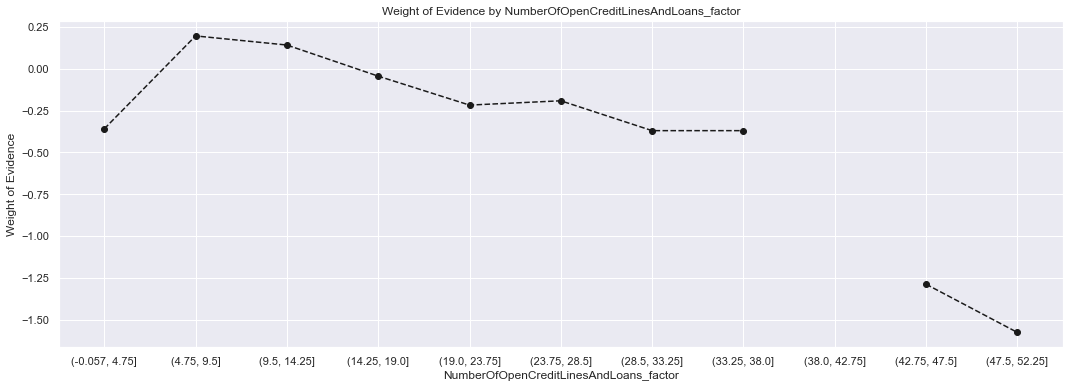

In [102]:
plot_by_woe(df_temp)

In [103]:
df_inputs_prepr['NumberOfOpenCreditLinesAndLoans:0-4'] = np.where((df_inputs_prepr['NumberOfOpenCreditLinesAndLoans'] <= 4), 1, 0)
df_inputs_prepr['NumberOfOpenCreditLinesAndLoans:5-9'] = np.where((df_inputs_prepr['NumberOfOpenCreditLinesAndLoans'] > 4) & (df_inputs_prepr['NumberOfOpenCreditLinesAndLoans'] <= 9), 1, 0)
df_inputs_prepr['NumberOfOpenCreditLinesAndLoans:9-14'] = np.where((df_inputs_prepr['NumberOfOpenCreditLinesAndLoans'] > 9) & (df_inputs_prepr['NumberOfOpenCreditLinesAndLoans'] <= 14), 1, 0)
df_inputs_prepr['NumberOfOpenCreditLinesAndLoans:14-19'] = np.where((df_inputs_prepr['NumberOfOpenCreditLinesAndLoans'] > 14) & (df_inputs_prepr['NumberOfOpenCreditLinesAndLoans'] <= 19), 1, 0)
df_inputs_prepr['NumberOfOpenCreditLinesAndLoans:>19'] = np.where((df_inputs_prepr['NumberOfOpenCreditLinesAndLoans'] > 19), 1, 0)

In [104]:
list(df_inputs_prepr)

['Unnamed: 0',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'age_factor',
 'age:<=21',
 'age:22-43',
 'age:44-65',
 'age:66>=',
 'RevolvingUtilizationOfUnsecuredLines_factor',
 'RevolvingUtilizationOfUnsecuredLines:<0.15',
 'RevolvingUtilizationOfUnsecuredLines:0.15-0.3',
 'RevolvingUtilizationOfUnsecuredLines:0.3-0.45',
 'RevolvingUtilizationOfUnsecuredLines:0.45-0.6',
 'RevolvingUtilizationOfUnsecuredLines:0.6-0.75',
 'RevolvingUtilizationOfUnsecuredLines:0.75-0.9',
 'RevolvingUtilizationOfUnsecuredLines:0.9-1.05',
 'RevolvingUtilizationOfUnsecuredLines:1.05-1.20',
 'NumberOfTime30-59DaysPastDueNotWorse_factor',
 'NumberOfTime30-59DaysPastDueNotWorse:0',
 'NumberOfTime30-59DaysPastDueNotWorse:=1',
 'NumberOfTime30-59DaysPastDueNotWorse:>1',
 'Number

In [105]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['NumberRealEstateLoansOrLines'] <= 2, : ]
df_inputs_prepr['NumberRealEstateLoansOrLines_factor'] = pd.cut(df_inputs_prepr_temp['NumberRealEstateLoansOrLines'], 3)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'NumberRealEstateLoansOrLines_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

****************************************************************************************************
        Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
96727        96728                              0.524894   44   
26241        26242                              0.175686   59   
2345          2346                              0.083254   42   
63665        63666                              0.191490   33   
106509      106510                              0.000000   30   
130093      130094                              0.004738   56   
80480        80481                              1.000000   43   
132589      132590                              0.660910   77   
74562        74563                              0.303710   36   
97574        97575                              0.312037   51   
28071        28072                              0.073245   37   
28820        28821                              0.000000   91   
74285        74286                              0.0504

,NumberRealEstateLoansOrLines_factor,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,"(-0.002, 0.667]",11364,0.078405,0.405119,891.0,10473.0,0.398577,0.501972,-0.230644,0.045789
1,"(0.667, 1.333]",10535,0.050403,0.375566,531.0,10004.0,0.380728,0.299155,0.241123,0.045789
2,"(1.333, 2.0]",6152,0.057380,0.219315,353.0,5799.0,0.220696,0.198873,0.104117,0.045789


In [106]:
df_inputs_prepr['NumberRealEstateLoansOrLines:0'] = np.where((df_inputs_prepr['NumberRealEstateLoansOrLines'] < 1), 1, 0)
df_inputs_prepr['NumberRealEstateLoansOrLines:1'] = np.where((df_inputs_prepr['NumberRealEstateLoansOrLines'] >= 1) & (df_inputs_prepr['NumberRealEstateLoansOrLines'] < 2), 1, 0)
df_inputs_prepr['NumberRealEstateLoansOrLines:2'] = np.where((df_inputs_prepr['NumberRealEstateLoansOrLines'] >=2 ) & (df_inputs_prepr['NumberRealEstateLoansOrLines'] < 3), 1, 0)
df_inputs_prepr['NumberRealEstateLoansOrLines:>=3'] = np.where((df_inputs_prepr['NumberRealEstateLoansOrLines'] >= 3) , 1, 0)

In [107]:
list(df_inputs_prepr)

['Unnamed: 0',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'age_factor',
 'age:<=21',
 'age:22-43',
 'age:44-65',
 'age:66>=',
 'RevolvingUtilizationOfUnsecuredLines_factor',
 'RevolvingUtilizationOfUnsecuredLines:<0.15',
 'RevolvingUtilizationOfUnsecuredLines:0.15-0.3',
 'RevolvingUtilizationOfUnsecuredLines:0.3-0.45',
 'RevolvingUtilizationOfUnsecuredLines:0.45-0.6',
 'RevolvingUtilizationOfUnsecuredLines:0.6-0.75',
 'RevolvingUtilizationOfUnsecuredLines:0.75-0.9',
 'RevolvingUtilizationOfUnsecuredLines:0.9-1.05',
 'RevolvingUtilizationOfUnsecuredLines:1.05-1.20',
 'NumberOfTime30-59DaysPastDueNotWorse_factor',
 'NumberOfTime30-59DaysPastDueNotWorse:0',
 'NumberOfTime30-59DaysPastDueNotWorse:=1',
 'NumberOfTime30-59DaysPastDueNotWorse:>1',
 'Number

In [108]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['NumberOfDependents'] <= 3, : ]
df_inputs_prepr['NumberOfDependents_factor'] = pd.cut(df_inputs_prepr_temp['NumberOfDependents'], 4)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'NumberOfDependents_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

****************************************************************************************************
        Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
96727        96728                              0.524894   44   
26241        26242                              0.175686   59   
2345          2346                              0.083254   42   
63665        63666                              0.191490   33   
106509      106510                              0.000000   30   
130093      130094                              0.004738   56   
80480        80481                              1.000000   43   
132589      132590                              0.660910   77   
74562        74563                              0.303710   36   
97574        97575                              0.312037   51   
28071        28072                              0.073245   37   
28820        28821                              0.000000   91   
74285        74286                              0.0504

,NumberOfDependents_factor,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,"(-0.003, 0.75]",18178,0.057322,0.621067,1042.0,17136.0,0.625379,0.557816,0.114328,0.021796
1,"(0.75, 1.5]",5345,0.068849,0.182616,368.0,4977.0,0.181636,0.197002,-0.081212,0.021796
2,"(1.5, 2.25]",3910,0.077749,0.133588,304.0,3606.0,0.131601,0.162741,-0.212384,0.021796
3,"(2.25, 3.0]",1836,0.083878,0.062728,154.0,1682.0,0.061385,0.082441,-0.294925,0.021796


In [109]:
df_inputs_prepr['NumberOfDependents:0'] = np.where((df_inputs_prepr['NumberOfDependents'] < 1), 1, 0)
df_inputs_prepr['NumberOfDependents:1'] = np.where((df_inputs_prepr['NumberOfDependents'] >= 1) & (df_inputs_prepr['NumberOfDependents'] < 2), 1, 0)
df_inputs_prepr['NumberOfDependents:2'] = np.where((df_inputs_prepr['NumberOfDependents'] >=2 ) & (df_inputs_prepr['NumberOfDependents'] < 3), 1, 0)
df_inputs_prepr['NumberOfDependents:>=3'] = np.where((df_inputs_prepr['NumberOfDependents'] >= 3) , 1, 0)

In [110]:
list(df_inputs_prepr)

['Unnamed: 0',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'age_factor',
 'age:<=21',
 'age:22-43',
 'age:44-65',
 'age:66>=',
 'RevolvingUtilizationOfUnsecuredLines_factor',
 'RevolvingUtilizationOfUnsecuredLines:<0.15',
 'RevolvingUtilizationOfUnsecuredLines:0.15-0.3',
 'RevolvingUtilizationOfUnsecuredLines:0.3-0.45',
 'RevolvingUtilizationOfUnsecuredLines:0.45-0.6',
 'RevolvingUtilizationOfUnsecuredLines:0.6-0.75',
 'RevolvingUtilizationOfUnsecuredLines:0.75-0.9',
 'RevolvingUtilizationOfUnsecuredLines:0.9-1.05',
 'RevolvingUtilizationOfUnsecuredLines:1.05-1.20',
 'NumberOfTime30-59DaysPastDueNotWorse_factor',
 'NumberOfTime30-59DaysPastDueNotWorse:0',
 'NumberOfTime30-59DaysPastDueNotWorse:=1',
 'NumberOfTime30-59DaysPastDueNotWorse:>1',
 'Number

In [111]:
loan_data_inputs_train = df_inputs_prepr

In [112]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')

In [113]:
loan_data_inputs_test = df_inputs_prepr

In [146]:
#loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
#loan_data_targets_test.to_csv('loan_data_targets_test.csv')